# Informações iniciais
Neste notebook é apresentado uma resolução do desafio "House Prices: Advanced Regression Techniques". Como modelo de aprendizado de maquina foram utilizados: 
* LGBMRegressor
* XGBRegressor
* GradientBoostingRegressor

Link para o download da base de dados: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

# Importações

In [1]:
import math # Matematica
import pandas as pd # Pre-processamento
import numpy as np # Algebra linear
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn.metrics as metrics
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

import warnings
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn # ignora alguns avisos irritantes(das bibliotescas sklearn e seaborn)

In [2]:
# Lendo a base de dados
train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv')

In [3]:
train

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [4]:
test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


#  Pré-processamento de Dados

### Normalizando os dados


 mu = 180921.20 e sigma = 79415.29



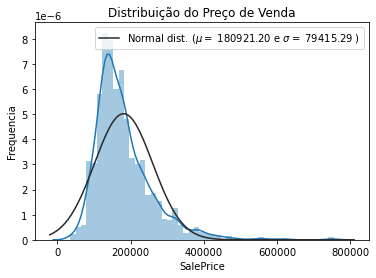

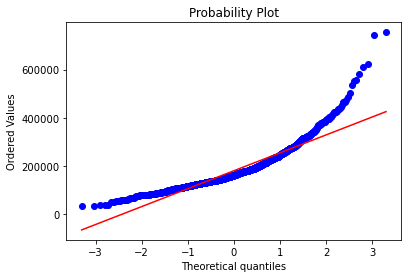

In [5]:
sns.distplot(train['SalePrice'] , fit=norm);

# Obtem os paramentros ajustados pela função
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} e sigma = {:.2f}\n'.format(mu, sigma))

# Exibe a distribuição atual
plt.legend(['Normal dist. ($\mu=$ {:.2f} e $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequencia')
plt.title('Distribuição do Preço de Venda')

# Também obtem o QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

In [6]:
# Normaliza
train["SalePrice"] = np.log1p(train["SalePrice"])


 mu = 12.02 and sigma = 0.40



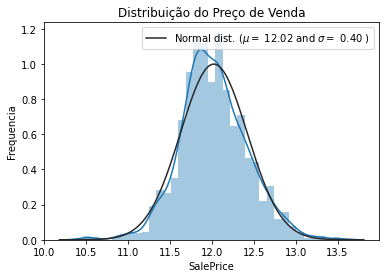

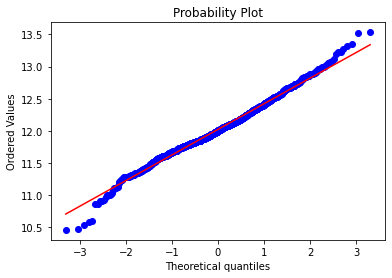

In [7]:
sns.distplot(train['SalePrice'] , fit=norm);

# Obtem os paramentros ajustados pela função
(mu, sigma) = norm.fit(train['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Exibe a distribuição atual
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequencia')
plt.title('Distribuição do Preço de Venda')

# Também obtem o QQ-plot
fig = plt.figure()
res = stats.probplot(train['SalePrice'], plot=plt)
plt.show()

## Engenharia de Recursos

In [8]:
# Concatena as bases de dados para facilitar o pré-processamento
data = pd.concat([train, test])

In [9]:
data.set_index('Id', inplace = True)

In [10]:
data.isnull().sum()[:50]

MSSubClass         0
MSZoning           4
LotFrontage      486
LotArea            0
Street             0
Alley           2721
LotShape           0
LandContour        0
Utilities          2
LotConfig          0
LandSlope          0
Neighborhood       0
Condition1         0
Condition2         0
BldgType           0
HouseStyle         0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
RoofStyle          0
RoofMatl           0
Exterior1st        1
Exterior2nd        1
MasVnrType        24
MasVnrArea        23
ExterQual          0
ExterCond          0
Foundation         0
BsmtQual          81
BsmtCond          82
BsmtExposure      82
BsmtFinType1      79
BsmtFinSF1         1
BsmtFinType2      80
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
Heating            0
HeatingQC          0
CentralAir         0
Electrical         1
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       2
BsmtHalfBath 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2915 non-null   object 
 2   LotFrontage    2433 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          198 non-null    object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   Utilities      2917 non-null   object 
 9   LotConfig      2919 non-null   object 
 10  LandSlope      2919 non-null   object 
 11  Neighborhood   2919 non-null   object 
 12  Condition1     2919 non-null   object 
 13  Condition2     2919 non-null   object 
 14  BldgType       2919 non-null   object 
 15  HouseStyle     2919 non-null   object 
 16  OverallQual    2919 non-null   int64  
 17  OverallCond    2919 non-null   int64  
 18  YearBuil

### Trabalhando com Valores Faltantes

Olhando o arquivo data_description.txt (vem junto com a base de dados) podemos fazer varios ajustes nos dados: 

In [12]:
data['PoolQC'].fillna('None', inplace=True) # Valor NaN significa 'Sem Pscina'
data['MiscFeature'].fillna('None', inplace=True) # Valore NaN significa 'Sem Funcionalidade diversa'
data['Alley'].fillna('None', inplace=True) # Valor NaN significa 'Sem acesso ao beco'
data['Fence'].fillna('None', inplace=True) # Valor NaN significa 'Sem cerca'
data['FireplaceQu'].fillna('None', inplace=True) # Valor NaN significa 'Sem Lareira'

In [13]:
# Como a área de cada rua conectada à propriedade da casa, muito provavelmente tem uma área semelhante a outras casas em seu bairro, podemos preencher os valores que faltam pela mediana da 'LotFrontage' do bairro.
data["LotFrontage"] = data.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

In [14]:
# GarageType, GarageFinish, GarageQual e GarageCond: Repondo dados faltantes por None
for col in ('GarageType', 'GarageFinish', 'GarageQual', 'GarageCond'):
    data[col] = data[col].fillna('None')

In [15]:
# GarageYrBlt, GarageArea e GarageCars : Repondo dados faltantes por 0 (Pois Sem garagem = sem carros na garagem.)
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars'):
    data[col] = data[col].fillna(0)

In [16]:
# BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath e BsmtHalfBath : Dados faltantes provavelmente são zeros (pois o lugar pode não ter porão)
for col in ('BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    data[col] = data[col].fillna(0)

In [17]:
# BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1 e BsmtFinType2 : Para todas essas categorias que tem relação com porão, NaN ssignifica que pode não ter porão.
for col in ('BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    data[col] = data[col].fillna('None')

In [18]:
# MasVnrArea e MasVnrType : Provavelmente Na significa 'sem folheado de alvenaria'. Nos podemos colocar a área como 0 e o tipo como None. 
data["MasVnrType"] = data["MasVnrType"].fillna("None")
data["MasVnrArea"] = data["MasVnrArea"].fillna(0)

In [19]:
# MSZoning (Classificação geral de zoneamento) : 'RL' é de longe o valor mais comum. Nesse caso nos podemos substituir  Na por 'RL'
data['MSZoning'] = data['MSZoning'].fillna(data['MSZoning'].mode()[0])

In [20]:
# Utilities : Para essa caracteristica categorica todos os valores são "AllPub", exceto um "NoSeWa" e 2 NA. Como a casa com 'NoSewa' está no conjunto de treinamento, esse recurso não ajudará na modelagem preditiva. Podemos então removê-lo tranquilamente.
data = data.drop(['Utilities'], axis=1)

In [21]:
# Functional : A descrição dos dados diz que NA significa typical
data["Functional"] = data["Functional"].fillna("Typ")

In [22]:
# Electrical : Esse tem apenas um valor Na. Como a caracteristica mais comum é 'SBrkr', podemos substituir o valor faltante por este.
data['Electrical'] = data['Electrical'].fillna(data['Electrical'].mode()[0])

In [23]:
# KitchenQual: Apenas um valor Na. Como a caracteristica mais comum é 'TA', podemos substituir o valor faltante por este.
data['KitchenQual'] = data['KitchenQual'].fillna(data['KitchenQual'].mode()[0])

In [24]:
# Exterior1st e Exterior2nd : Denovo, como Exterior 1 e 2 tem apenas um valor faltante. Vamos substituir esse valor pelo valor mais comum da coluna.
data['Exterior1st'] = data['Exterior1st'].fillna(data['Exterior1st'].mode()[0])
data['Exterior2nd'] = data['Exterior2nd'].fillna(data['Exterior2nd'].mode()[0])

In [25]:
# SaleType : Preenchendo denovo com o valor mais comum: "WD"
data['SaleType'] = data['SaleType'].fillna(data['SaleType'].mode()[0])

In [26]:
# MSSubClass : Na provavelmente significa Sem aula de construção. Vamos substituilos por None
data['MSSubClass'] = data['MSSubClass'].fillna("None")

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2919 entries, 1 to 2919
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     2919 non-null   int64  
 1   MSZoning       2919 non-null   object 
 2   LotFrontage    2919 non-null   float64
 3   LotArea        2919 non-null   int64  
 4   Street         2919 non-null   object 
 5   Alley          2919 non-null   object 
 6   LotShape       2919 non-null   object 
 7   LandContour    2919 non-null   object 
 8   LotConfig      2919 non-null   object 
 9   LandSlope      2919 non-null   object 
 10  Neighborhood   2919 non-null   object 
 11  Condition1     2919 non-null   object 
 12  Condition2     2919 non-null   object 
 13  BldgType       2919 non-null   object 
 14  HouseStyle     2919 non-null   object 
 15  OverallQual    2919 non-null   int64  
 16  OverallCond    2919 non-null   int64  
 17  YearBuilt      2919 non-null   int64  
 18  YearRemo

No missing values

In [28]:
# Transformando algumas variáveis numericas que na verdade são categoricas

# MSSubClass=Sem aula de construção
data['MSSubClass'] = data['MSSubClass'].apply(str)


# Mudando OverallCond para variavel categorica
data['OverallCond'] = data['OverallCond'].astype(str)


# Ano e mes vendido transformados para variáveis categoricas
data['YrSold'] = data['YrSold'].astype(str)
data['MoSold'] = data['MoSold'].astype(str)

In [29]:
# Aplicando Label Encoding em algumas variáveis categóricas que podem conter informações em seu conjunto de ordenação

from sklearn.preprocessing import LabelEncoder
cols = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'PoolQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'Fence', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'Street', 'Alley', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold')
# Processa as colunas, e aplica LabelEncoder para variáveis categoricas
for c in cols:
    lbl = LabelEncoder() 
    lbl.fit(list(data[c].values)) 
    data[c] = lbl.transform(list(data[c].values))

# Formato        
print('Shape data: {}'.format(data.shape))

Shape data: (2919, 79)


In [30]:
# Representa as variáveis categoricas de uma forma numérica
data = pd.get_dummies(data)
print(data.shape)

(2919, 221)


In [31]:
train = data[:1460]
test = data[1460:].drop('SalePrice', axis = 1)

In [32]:
train.shape, test.shape

((1460, 221), (1459, 220))

# Modelo

In [33]:
X = train.drop('SalePrice', axis = 1)
y = train['SalePrice']

In [34]:
# Divide a base em treino e validação
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

* XGBRegressor

In [35]:
xgb = XGBRegressor(booster='gbtree', colsample_bylevel=1,
                   colsample_bynode=1,colsample_bytree=0.6,
                   gamma=0, importance_type='gain',
                   learning_rate=0.01, max_delta_step=0,
                   max_depth=4,min_child_weight=1.5,
                   n_estimators=2500, n_jobs=1, nthread=None,
                   objective='reg:linear', reg_alpha=0.4640,
                   reg_lambda=0.6, scale_pos_weight=1,
                   silent=None, subsample=0.8, verbosity=1)

* LGBMRegressor

In [36]:
lgbm = LGBMRegressor(objective='regression',
                    num_leaves=4,
                    learning_rate=0.01,
                    n_estimators=11000,
                    max_bin=200,
                    bagging_fraction=0.75,
                    bagging_freq=5,
                    bagging_seed=7,
                    feature_fraction=0.4)

* GradientBoostingRegressor

In [37]:
gboost = GradientBoostingRegressor(n_estimators=3000, 
                                   learning_rate=0.05,
                                   max_depth=4, 
                                   max_features='sqrt',
                                   min_samples_leaf=15, 
                                   min_samples_split=10, 
                                   loss='huber', 
                                   random_state =5)

## Ajusta e valida os modelos

In [38]:
xgb.fit(X_train, y_train)
lgbm.fit(X_train, y_train, eval_metric='rmsle')
gboost.fit(X_train, y_train)

[12:50:48] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:51:07] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=5)

In [39]:
pred2 = xgb.predict(X_test)
pred3 = lgbm.predict(X_test)
pred4 = gboost.predict(X_test)

In [40]:
print('Erro médio logarítmico de raiz quadrado test (XGB) = ' + str(math.sqrt(metrics.mean_squared_log_error(y_test, pred2))))
print('Erro médio logarítmico de raiz quadrado test (LGBM) = ' + str(math.sqrt(metrics.mean_squared_log_error(y_test, pred3))))
print('Erro médio logarítmico de raiz quadrado test (GBoost) = ' + str(math.sqrt(metrics.mean_squared_log_error(y_test, pred4))))

Erro médio logarítmico de raiz quadrado test (XGB) = 0.010442551631785863
Erro médio logarítmico de raiz quadrado test (LGBM) = 0.01065575032268472
Erro médio logarítmico de raiz quadrado test (GBoost) = 0.01037617743944091


## Treino e Previsão (Usando toda a base de dados)

In [41]:
lgbm.fit(X, y)   # 0.12269 
xgb.fit(X ,y)    # 0.12495
gboost.fit(X, y) # 0.12333

[12:51:29] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[12:51:52] WARNING: /workspace/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


GradientBoostingRegressor(learning_rate=0.05, loss='huber', max_depth=4,
                          max_features='sqrt', min_samples_leaf=15,
                          min_samples_split=10, n_estimators=3000,
                          random_state=5)

In [42]:
prediction_lgbm =  np.expm1(lgbm.predict(test))
prediction_xgb = np.expm1(xgb.predict(test))
prediction_gboost = np.expm1(gboost.predict(test))

In [43]:
"""
prediction = ( prediction_lgbm * 0.38 + prediction_gboost * 0.35 + prediction_xgb * 0.27)   # 0.12006
prediction = ( prediction_lgbm * 0.4 + prediction_gboost * 0.35 + prediction_xgb * 0.25)    # 0.12007
prediction = ( prediction_lgbm * 0.45 + prediction_gboost * 0.35 + prediction_xgb * 0.2)    # 0.12012
prediction = ( prediction_lgbm * 0.55 + prediction_gboost * 0.45)                           # 0.12061
prediction = ( prediction_lgbm * 0.45 + prediction_gboost * 0.55)                           # 0.12069
prediction = ( prediction_gboost * 0.15 + prediction_lgbm * 0.7 + prediction_gboost * 0.15) # 0.12086
prediction = ( prediction_gboost * 0.2 + prediction_lgbm * 0.5 + prediction_gboost * 0.3)   # 0.12154
prediction = ( prediction_lgbm * 0.55 + prediction_xgb * 0.45)                              # 0.12155
"""

'\nprediction = ( prediction_lgbm * 0.38 + prediction_gboost * 0.35 + prediction_xgb * 0.27)   # 0.12006\nprediction = ( prediction_lgbm * 0.4 + prediction_gboost * 0.35 + prediction_xgb * 0.25)    # 0.12007\nprediction = ( prediction_lgbm * 0.45 + prediction_gboost * 0.35 + prediction_xgb * 0.2)    # 0.12012\nprediction = ( prediction_lgbm * 0.55 + prediction_gboost * 0.45)                           # 0.12061\nprediction = ( prediction_lgbm * 0.45 + prediction_gboost * 0.55)                           # 0.12069\nprediction = ( prediction_gboost * 0.15 + prediction_lgbm * 0.7 + prediction_gboost * 0.15) # 0.12086\nprediction = ( prediction_gboost * 0.2 + prediction_lgbm * 0.5 + prediction_gboost * 0.3)   # 0.12154\nprediction = ( prediction_lgbm * 0.55 + prediction_xgb * 0.45)                              # 0.12155\n'

In [44]:
prediction = ( prediction_lgbm * 0.38 + prediction_gboost * 0.36 + prediction_xgb * 0.26)   # 0.12006

## Submissão

In [45]:
# Tranforma o resultado em um DataFrame
submission = pd.DataFrame({"Id": test.index,"SalePrice": prediction})

In [46]:
# Transforma o DataFrame em um arquivo csv para ser submetido no kaggle.
submission.to_csv('submission.csv', index=False)

#### Se o notebook tiver sido útil, dê um upvote!

# Fontes:
    
1. https://www.kaggle.com/serigne/stacked-regressions-top-4-on-leaderboard#Modelling
2. https://www.kaggle.com/fedi1996/house-prices-data-cleaning-viz-and-modeling